<h1>Figure 6</h1>
<p>The following files contain data used in the analyses for this figure:</p>
<table>
    <tr>
        <th>File</th>
        <th>Content</th>
    </tr>
    <tr>
        <td><a href="Raw Data/110625 SGRP FLucs 1.csv" target=_blank>110625 SGRP FLucs 1.csv</a> and <a href="Raw Data/110626 SGRP FLucs 2.csv" target=_blank>110626 SGRP FLucs 2.csv</a></td>
        <td>Growth rates for yeast strains from the SGRP collection comparing the effect of maxFLuc and veecotr control.</td>
    </tr>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%cd Scripts
%run GR.py
%cd ..

C:\Users\Tvon-\Dropbox\Python\18 Codon Selection\Scripts
C:\Users\Tvon-\Dropbox\Python\18 Codon Selection


In [2]:
#read in the two growth rate datasets
GR_1 = process_GR('Raw Data/110625 SGRP FLucs 1.csv', normalise=False, starting_row=8)
GR_2 = process_GR('Raw Data/110626 SGRP FLucs 2.csv', normalise=False, starting_row=8)
#combine the two datasets
GR_SGRP = pd.concat([GR_1,GR_2], ignore_index=True)
#remove data for emtpy wells
GR_SGRP = GR_SGRP.loc[GR_SGRP['Plasmid'] != 'empty']
#split factor into separate factors for Strain and vector
strain,vector = [],[]
for row in range(GR_SGRP.shape[0]):
    this_factor = GR_SGRP.iloc[row].Plasmid
    fact1,fact2 = this_factor.split(':')
    strain.append(fact1)
    vector.append(fact2)

GR_SGRP['Strain'] = strain
GR_SGRP['Vector'] = vector

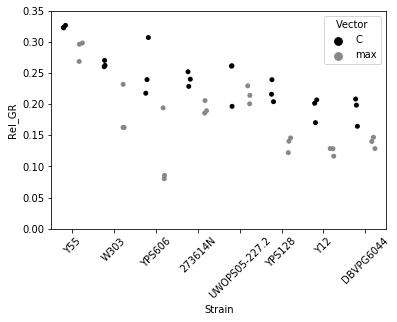

In [3]:
#calculate the means of the control growth rates for each strain (this will be used to 
#determine the plotting order in the plots below)
strain_list,mean_C,mean_max = [],[],[]
for strain in GR_SGRP.Strain.unique():
    strain_set = GR_SGRP.loc[GR_SGRP['Strain'] == strain]
    strain_list.append(strain)
    mean_C.append(np.mean(np.array(strain_set.loc[strain_set['Vector']=='C']['Rel_GR'])))
    mean_max.append(np.mean(np.array(strain_set.loc[strain_set['Vector']=='max']['Rel_GR'])))
comp_frame = pd.DataFrame({'Strain':strain_list,'Mean_C':mean_C,'Mean_max':mean_max})
strain_order = list(comp_frame.sort_values('Mean_C',ascending=0)['Strain'])
#calculate the relative loss in growth rate and add to data frame
comp_frame['Rel_Loss'] = comp_frame['Mean_max']/comp_frame['Mean_C'] - 1

plt.close()
sns.set_palette(['#000000','#888888'])
sns.stripplot(x='Strain',y='Rel_GR',hue='Vector',data=GR_SGRP,jitter=True,dodge=True,order=strain_order)
plt.ylim(0,0.35)
plt.xticks(rotation=45)
#plt.savefig('Figure 6a.svg')
plt.show()

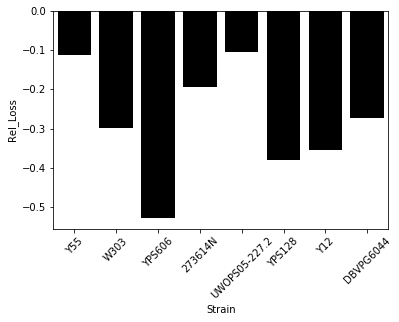

In [4]:
plt.close()
sns.barplot(x='Strain',y='Rel_Loss',data=comp_frame,order=strain_order,color='black')
plt.xticks(rotation=45)
#plt.savefig('Figure 6b.svg')
plt.show()